# **PCA with MNIST**
## ECE204 Data Science & Engineering

Let's investigate a real world example of PCA with the [MNIST digits dataset][mnist]. This is a very popular dataset that looks like:

![](https://upload.wikimedia.org/wikipedia/commons/2/27/MnistExamples.png)

[mnist]:https://en.wikipedia.org/wiki/MNIST_database

This is a very simple dataset. **How good is PCA at finding the components that best describe this dataset?**

### Data

In [1]:
import numpy as np
import pandas as pd


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [6]:
data = np.load("mnist.npz")
X = data["X"]
labels = data["y"]

This data is 70,000 images, each of which are 28x28, or have 784 pixels each. The rows are concatenated to conform with "tidy" data, which is what Scikit-Learn expects:

In [7]:
X.shape

(70000, 784)

These images are 28 x 28 images, which means that there are 784 pixel values for each image. Each row of X has 784 numbers (which is 28x28)

In [8]:
# visualize one of the digits (reshape to 28x28)
np.set_printoptions(linewidth=300)
X[5].reshape(28,28)

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  13,  25, 100, 122,   7,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  33, 151, 208, 252, 252, 252, 146

In [ ]:
labels.shape

Let's better visulize this as an image. To do this, matplotlib will need to be imported (Pandas plotting is a wrapper around matplotlib):

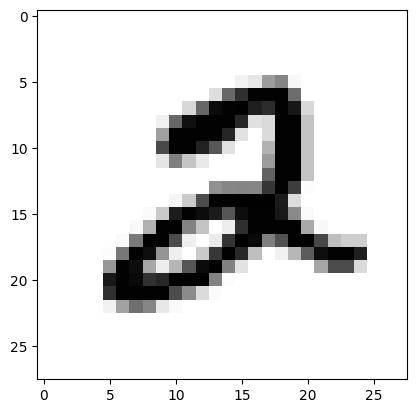

In [10]:
import matplotlib.pyplot as plt

plt.imshow(X[5].reshape(28,28), cmap='gray_r');

Let's visualize a random selection of images:

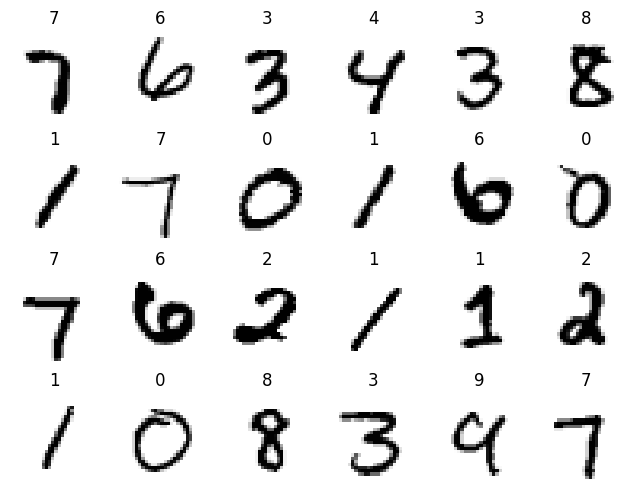

In [11]:
# create a d1 x d2 grid of subplots
rows, cols = 4, 6
fig, axs = plt.subplots(nrows=rows, ncols=cols, figsize=(8,6))

for i in range(rows):
    for j in range(cols):
    
        # pick an image at random
        k = np.random.randint(len(labels))

        # reshape the image
        img = X[k].reshape(28,28)
        label = labels[k]

        # plot the image
        axs[i,j].imshow(img, cmap='gray_r')
        axs[i,j].set_title(str(label))
        axs[i,j].axis('off')

Running this cell multiple times will show different images because no random seed is set.

This data is complicated because the handwritten numbers...

* are in different places
* are of different widths
* have different shapes

This prompts a couple questions:

1. How many dimensions are required to effectively code this data?
2. How good is that embedding?

# How many dimensions are needed?

Specifically, how many dimensions are needed to explain 90% of the variance? This will look at the standard deviation of the same pixel in different images. However, there's no control on image location: the handwriting can appear anywhere. **Why should the standard deviation of the same pixel in different images mean anything?**

This can be found by passing computing all the principal components, then using the `explained_variance_ratio_` attribute.

In [3]:
from sklearn.decomposition import PCA
embedding = PCA()

We *could* say "explain 90% of the variance", but let's look at *all* data PCA has to offer and make sure that 0.90 is a good value.

The [Scikit-Learn PCA documentation][pca] explains that when `PCA()` is called with no arguments, it computes *all* the principal components.

[pca]:https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html#sklearn.decomposition.PCA

In [12]:
embedding.fit(X)

PCA()

In [13]:
import pandas as pd

dims = pd.Index(range(1,785), name="dimensions")
dim_explain = pd.Series(embedding.explained_variance_ratio_, index=dims)
dim_explain.head(20)

dimensions
1     0.097461
2     0.071554
3     0.061495
4     0.054034
5     0.048889
6     0.043052
7     0.032783
8     0.028896
9     0.027584
10    0.023421
11    0.021067
12    0.020376
13    0.017071
14    0.016940
15    0.015834
16    0.014863
17    0.013194
18    0.012790
19    0.011873
20    0.011529
dtype: float64

This information says "the 4th principal component explains 5.4% of the variance", and so on. To see the cumulative effect (variace explained by the first k components combined), where k=1,2,..., we can use the Series `cumsum` method:

In [ ]:
ax = dim_explain.cumsum().plot(grid=True, figsize = (6,6), fontsize = 14)
ax.set_ylabel('Fractional Variance Explained', fontsize = 14)
ax.set_xlabel('Dimensions', fontsize = 14)
ax.set_title('Cumulative Variance vs Dimensions', fontsize = 16);

Looks like around 100 features are needed in the MNIST dataset to explain 90% of the variance.

There's another method to find how many principal components explain 90% of the variance:

> If called with just a number between 0 and 1, it uses just enough principal components to explain this amount of variance. More information about this in the documentation:
>
> https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html#sklearn.decomposition.PCA

Let's use that to explain 90% of the variance for this dataset.

# Principal Component Analysis

In [14]:
embedding = PCA(n_components = 0.90)

#For in-class activity:
#embedding = PCA(n_components = 2)

In [15]:
# compressed version of the dataset (reduced dimensions)
X_low = embedding.fit_transform(X)

Exactly how many principal components were used to explain 90% of the variance?

In [16]:
embedding.n_components_, embedding.explained_variance_ratio_.sum()

(87, 0.9005229738568303)

Great – 90% of the variance is explained by 87 dimensions.

How well does this perform? Let's visualize that by seeing how well the embedding performs. It takes points in 28x28 images (or 784 pixel values) and approximates that with `n_components` principal components that are each 28x28 (or 784 images).

A reconstruction of the original 28x28 image can be found from only the `n_components` 28x28 principal components. How well does that reconstruction look? Let's use the `inverse_tranform` method to reconstruct the digits from the PCA approximation:

In [ ]:
# Use inverse transform to construct approximation to original dataset
X_inv = embedding.inverse_transform(X_low)

Let's visualize the original images and the reconstructed image:

In [ ]:
fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(6,8))

for left, right in axs:
    
    # pick an image at random
    k = np.random.randint(len(labels))
    
    # reshape images
    img = X[k].reshape(28, 28)
    img_est = X_inv[k].reshape(28, 28).clip(min=0,max=255)
    
    left.imshow(img, cmap='gray_r')
    left.set_title('original')
    left.axis('off')
    right.imshow(img_est, cmap='gray_r')
    right.set_title('reconstructed')
    right.axis('off')

This is very useful as a compression technique. PCA has some internal structure that allows it to map from `n_components` features to 784 features. Given the quality of the reconstruction, that means the images could be stored with 87 dimensions instead of 784 dimensions (alongside the `n_components` principal components given by the `PCA` object).

## Visualization

Let's visualize the principal components of these images:

In [ ]:
N = min(embedding.n_components_, 10)
principal_components = [embedding.components_[k].reshape(28,28) for k in range(N)]

In [ ]:
fig, axs = plt.subplots(ncols=10, figsize=(20, 2))
i = 0
for img, ax in zip(principal_components, axs):
    ax.imshow(img, cmap='bwr')
    i = i+1
    ax.set_title('PC ' + str(i))
    ax.axis('off')

In [ ]:
# let's take a closer look: NOTE! these are normalized vectors!
plt.imshow(principal_components[0], cmap='bwr')
plt.colorbar();

The first image is the first principal component. It's the most important because it's the first one. It says "the most basic approximation using PCA to any digit is somewhat 0 shaped".

Let's visualize the two dimensions, the two dimensions marked as "most important" by PCA.

In [ ]:
Y = np.hstack((X_low[:,:2],labels[:,None]))
#print(np.shape(Y))
show = pd.DataFrame(Y, columns = ['1st PCA Coef', '2nd PCA Coef', 'Labels'])
ax = show.plot.scatter(x=0, y=1, style="o", c=2, cmap="tab10", s=10, colorbar = True,  sharex=False, figsize = (8,6), fontsize = 12)
ax.set_title('Scatterplot of 1st and 2nd PCA Coefficients for All Digits', fontsize=14);

Let's visualize only two digits projected onto these two dimensions

In [ ]:
idx = (labels == 0) | (labels == 1)
ax = show[idx].plot.scatter(x=0, y=1, style="o", c=labels[idx], cmap="tab10", s=10, colorbar = False, figsize = (8,6), fontsize=12)
ax.set_title('Scatterplot of 1st and 2nd PCA Coefficients for Digits 0 and 1');